In [1]:
# Print multiple statements in same line 
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

Answer 11: The total number of survivors in the third class (Pclass = 3)

Total number of survivors in 3rd class: 119


<Axes: xlabel='survived'>

Text(0.5, 1.0, 'Survivors vs Non-Survivors in 3rd Class')

Text(0.5, 0, 'Survived (0 = No, 1 = Yes)')

Text(0, 0.5, 'Number of Passengers')

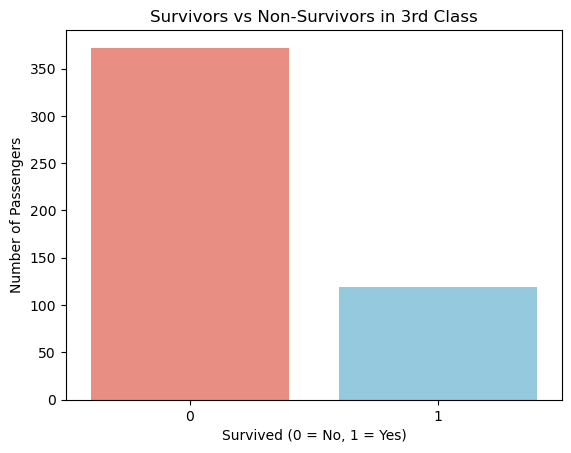

In [30]:
#Filter passengers who were in 3rd class and survived

third_class_survivors = titanic[(titanic['pclass'] == 3) & (titanic['survived'] == 1)]
#Here, we filter rows where passenger class = 3 and survival = 1 (means survived)

#Calculate total number of survivors in 3rd class
total_survivors_pclass3 = third_class_survivors.shape[0]  
#shape[0] gives the number of rows, i.e., total count of survivors
print("Total number of survivors in 3rd class:", total_survivors_pclass3)

#Visualize survivors vs non-survivors in 3rd class
pclass3_counts = titanic[titanic['pclass'] == 3]['survived'].value_counts()
#This gives the count of survived(1) and not-survived(0) among 3rd class passengers

# Define your own custom colors for the bars
colors = ['salmon', 'skyblue']  
# 'salmon' for non-survivors (0), 'skyblue' for survivors (1)

#Create a simple bar plot
sns.barplot(x=pclass3_counts.index, y=pclass3_counts.values, hue=pclass3_counts.index, palette=colors, legend=False)
#x-axis: 0 (Did not survive), 1 (Survived)
#y-axis: Count of passengers
#'color' adds a uniform color to the bars (future-safe vs. palette)

#Add titles and labels for clarity
plt.title("Survivors vs Non-Survivors in 3rd Class")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")

#Display the plot
plt.show()


Answer 12: The average age of female passengers who survived

Average age of female passengers who survived: 28.85 years


<Figure size 800x500 with 0 Axes>

<Axes: xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'Age Distribution of Female Passengers Who Survived')

Text(0.5, 0, 'Age (years)')

Text(0, 0.5, 'Number of Passengers')

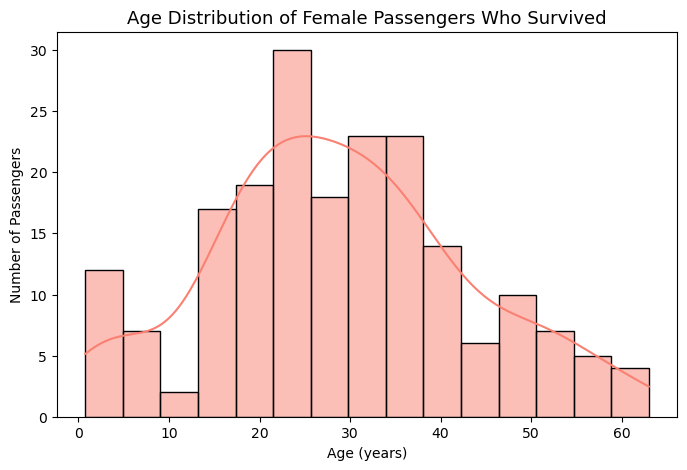

In [32]:
#Filter only female passengers who survived

female_survivors = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == 1)]
#This selects only the rows where:
#'sex' is 'female'
#'survived' is 1 (means survived)

#Calculate the average age of female survivors
average_age_female_survivors = female_survivors['age'].mean()
#mean() computes the average age while ignoring missing (NaN) values.

print(f"Average age of female passengers who survived: {average_age_female_survivors:.2f} years")

#Visualize the age distribution of female survivors
plt.figure(figsize=(8, 5))  # Set figure size for better clarity

# Create a histogram to visualize the distribution of ages
sns.histplot(female_survivors['age'], bins=15, kde=True, color='salmon')
# bins = 15 → divides the age range into 15 intervals
# kde=True → overlays a smooth curve showing the probability density
# color → adds a pleasant color tone

# Add labels and title
plt.title("Age Distribution of Female Passengers Who Survived", fontsize=13)
plt.xlabel("Age (years)")
plt.ylabel("Number of Passengers")

# Show the plot
plt.show()

Answer 13: The survival rate of passengers aged 0-18 years

Survival rate of passengers aged 0–18 years: 50.36%


<Figure size 700x500 with 0 Axes>

<Axes: xlabel='survived', ylabel='count'>

Text(0.5, 1.0, 'Survival Count of Passengers Aged 0–18 Years')

Text(0.5, 0, 'Survived (0 = No, 1 = Yes)')

Text(0, 0.5, 'Number of Passengers')

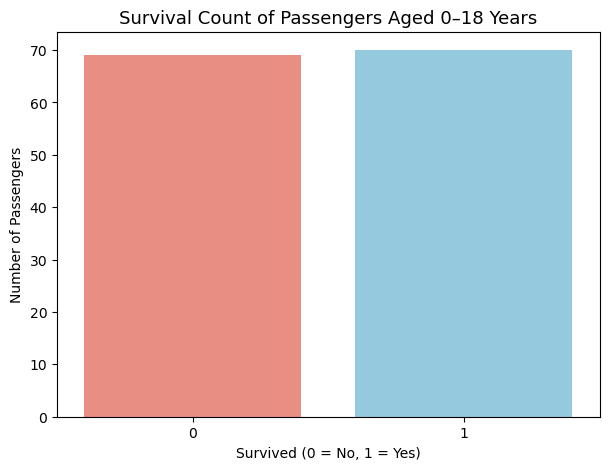

In [28]:
#Filter passengers aged 0–18 years

young_passengers = titanic[(titanic['age'] >= 0) & (titanic['age'] <= 18)]
#We select rows where the age is between 0 and 18 (inclusive).
#These are considered child or teenage passengers.


#Calculate survival rate for this group
survival_rate_young = young_passengers['survived'].mean() * 100
#The 'survived' column has 1 for survived and 0 for not survived.
#Taking the mean gives the proportion of 1s (survival rate).
#Multiply by 100 to convert to a percentage.

print(f"Survival rate of passengers aged 0–18 years: {survival_rate_young:.2f}%")


#Visualize survival count among young passengers

plt.figure(figsize=(7, 5))  # Set the figure size

# Define your own custom colors for the bars
colors = ['salmon', 'skyblue']  
# 'salmon' for non-survivors (0), 'skyblue' for survivors (1)

sns.countplot(data=young_passengers, x='survived', hue='survived', palette=colors, legend=False)

#Add labels and title
plt.title("Survival Count of Passengers Aged 0–18 Years", fontsize=13)
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")

#Display the plot
plt.show()

Answer 14: The survival rate of male passengers traveling alone (i.e., sibsp == 0 and parch == 0)

Survival rate of male passengers traveling alone: 15.57%


<Figure size 700x500 with 0 Axes>

<Axes: xlabel='survived', ylabel='count'>

Text(0.5, 1.0, 'Survival Count of Male Passengers Traveling Alone')

Text(0.5, 0, 'Survived (0 = No, 1 = Yes)')

Text(0, 0.5, 'Number of Passengers')

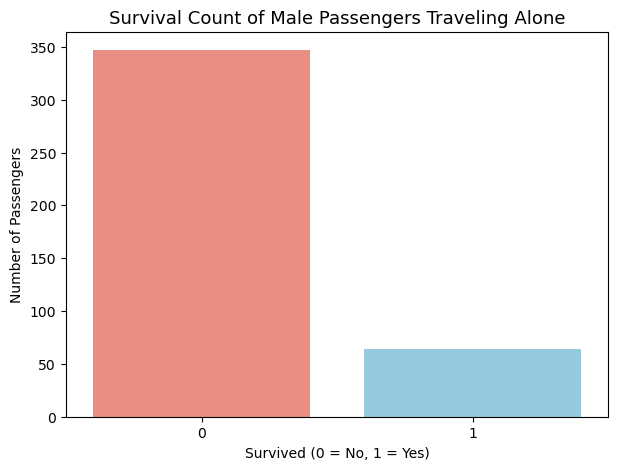

In [27]:
#Filter male passengers who were traveling alone

male_alone = titanic[(titanic['sex'] == 'male') & (titanic['sibsp'] == 0) & (titanic['parch'] == 0)]
#sex == 'male' → Only male passengers
#sibsp == 0    → No siblings/spouses aboard
#parch == 0    → No parents/children aboard
#Hence, 'male_alone' includes only male passengers traveling completely alone.

#Calculate the survival rate of this group

survival_rate_male_alone = male_alone['survived'].mean() * 100
# 'survived' column → 1 = survived, 0 = did not survive
# mean() gives the proportion of survivors (average of 0s and 1s)
# Multiply by 100 to convert to a percentage.
print(f"Survival rate of male passengers traveling alone: {survival_rate_male_alone:.2f}%")

#Visualize the survival count of these passengers
plt.figure(figsize=(7, 5))  # Set figure size for clarity

# Define two custom colors for the bars
colors = ['salmon', 'skyblue']
# 'salmon' for non-survivors (0) and 'skyblue' for survivors (1)

# Create the countplot
sns.countplot(
    data=male_alone,          # Data source
    x='survived',             # Column to be plotted on the x-axis (0 = no, 1 = yes)
    hue='survived',           # Assign hue to apply colors per category (required for multiple colors)
    palette=colors,           # Apply custom color palette
    legend=False              # Hide redundant legend (x-axis labels already explain it)
)

#Add chart title and labels
plt.title("Survival Count of Male Passengers Traveling Alone", fontsize=13)
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")

#Display the chart
plt.show()

Answer 15: The survival rate of passengers with siblings/spouses aboard (i.e., sibsp > 0)?

Survival rate of passengers with siblings/spouses aboard: 0.47


<Axes: xlabel='survived'>

Text(0.5, 1.0, 'Survival Count of Passengers with Siblings/Spouses Aboard')

Text(0.5, 0, 'Survived (0 = No, 1 = Yes)')

Text(0, 0.5, 'Number of Passengers')

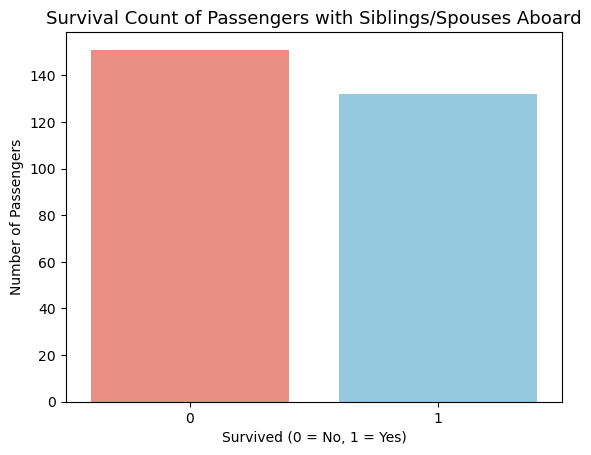

In [31]:
#Filter passengers who had siblings/spouses aboard (sibsp > 0)
with_siblings = titanic[titanic['sibsp'] > 0]
#This keeps only rows where the 'sibsp' value is greater than 0.

# Calculate the survival rate for these passengers
survival_rate = with_siblings['survived'].mean()
# The 'survived' column has 1 for survived, 0 for not survived.
# Taking the mean gives the proportion of survivors.
print(f"Survival rate of passengers with siblings/spouses aboard: {survival_rate:.2f}")

# Prepare data for visualization
# Count how many survived (1) vs. not survived (0)
survival_counts = with_siblings['survived'].value_counts().sort_index()

# Define custom colors for the bars
colors = ['salmon', 'skyblue']  # salmon = did not survive, skyblue = survived

# Create a bar plot for survivors vs non-survivors (future-safe Seaborn syntax)
sns.barplot(x=survival_counts.index, y=survival_counts.values, hue=survival_counts.index, palette=colors, legend=False)

# Add labels and title for clarity
plt.title("Survival Count of Passengers with Siblings/Spouses Aboard", fontsize=13)
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")

# Display the plot
plt.show()

Answer 16: Exploratory data analysis (EDA) on the Titanic dataset to uncover meaningful insights

(a) Summary statistics and data distribution for numerical and categorical variables.


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

--- Numerical Summary ---
         survived      pclass 

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

Text(0.5, 0.98, 'Distribution of Numerical Variables')

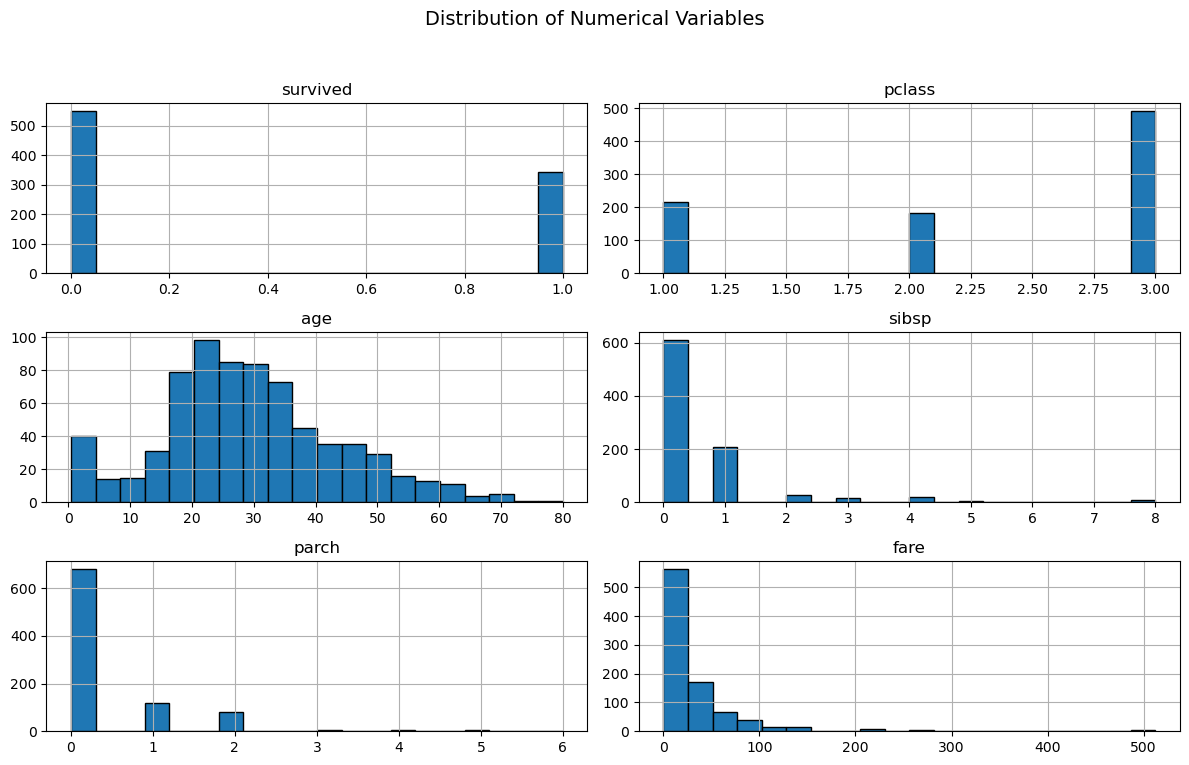

<Figure size 1400x1000 with 0 Axes>

<Axes: >

<Axes: xlabel='sex', ylabel='count'>

Text(0.5, 1.0, 'Count of sex')

([0, 1], [Text(0, 0, 'male'), Text(1, 0, 'female')])

<Axes: >

<Axes: xlabel='embarked', ylabel='count'>

Text(0.5, 1.0, 'Count of embarked')

([0, 1, 2], [Text(0, 0, 'S'), Text(1, 0, 'C'), Text(2, 0, 'Q')])

<Axes: >

<Axes: xlabel='class', ylabel='count'>

Text(0.5, 1.0, 'Count of class')

([0, 1, 2], [Text(0, 0, 'First'), Text(1, 0, 'Second'), Text(2, 0, 'Third')])

<Axes: >

<Axes: xlabel='who', ylabel='count'>

Text(0.5, 1.0, 'Count of who')

([0, 1, 2], [Text(0, 0, 'man'), Text(1, 0, 'woman'), Text(2, 0, 'child')])

<Axes: >

<Axes: xlabel='deck', ylabel='count'>

Text(0.5, 1.0, 'Count of deck')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G')])

<Axes: >

<Axes: xlabel='embark_town', ylabel='count'>

Text(0.5, 1.0, 'Count of embark_town')

([0, 1, 2],
 [Text(0, 0, 'Southampton'),
  Text(1, 0, 'Cherbourg'),
  Text(2, 0, 'Queenstown')])

<Axes: >

<Axes: xlabel='alive', ylabel='count'>

Text(0.5, 1.0, 'Count of alive')

([0, 1], [Text(0, 0, 'no'), Text(1, 0, 'yes')])

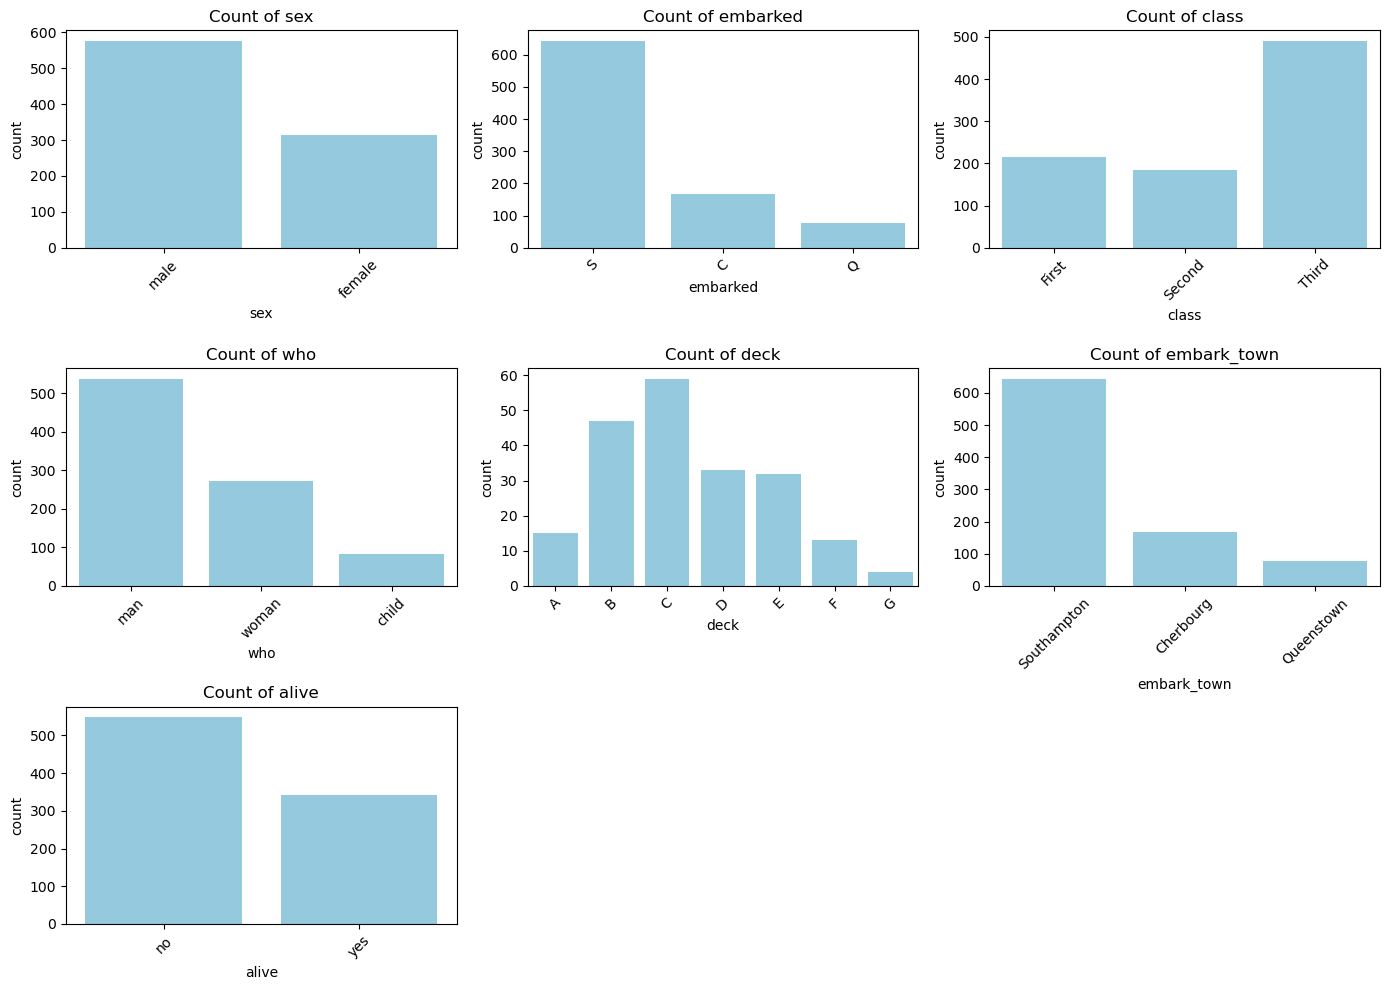

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'Age Distribution by Survival Status')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Count')

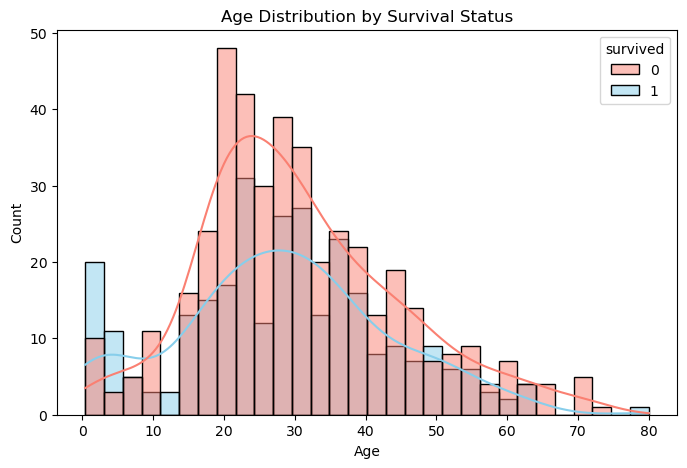

In [38]:
# Basic info & summaries
# -------------------------
print("\n--- Dataset Info ---")
titanic.info()   # shows dtypes and non-null counts

print("\n--- Numerical Summary ---")
print(titanic.describe())  # count, mean, std, min, quartiles, max for numeric cols

print("\n--- Categorical Summary ---")
print(titanic.describe(include=['object', 'category']))  # count, unique, top, freq

# -------------------------
# Numerical distributions
# -------------------------
# Select numeric columns (safe selection)
numerical_cols = titanic.select_dtypes(include=['number']).columns.tolist()

# Plot histograms for numeric columns using pandas/matplotlib (no seaborn palette)
titanic[numerical_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # prevent title overlap
plt.show()

# -------------------------
# Categorical distributions
# -------------------------
# Select categorical columns
categorical_cols = titanic.select_dtypes(include=['object', 'category']).columns.tolist()

# Create count plots for each categorical variable using a single safe color
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)                       # arrange plots in grid
    sns.countplot(data=titanic, x=col, color='skyblue')  # single color avoids palette/hue warning
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------
# Contextual numeric plot: Age vs survival (hue used correctly)
# -------------------------
# Here we use hue='survived' and pass an explicit palette list (safe because hue is set)
plt.figure(figsize=(8, 5))
sns.histplot(data=titanic, x='age', hue='survived', bins=30, kde=True, palette=['salmon', 'skyblue'])
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

(b) Analysis of missing values and their potential impact


--- Missing Values per Column ---
deck           688
age            177
embarked         2
embark_town      2
dtype: int64


<Figure size 1000x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Missing Values Heatmap — Titanic Dataset')

Text(0.5, 25.581597222222214, 'Columns')

Text(95.72222222222221, 0.5, 'Row Index')

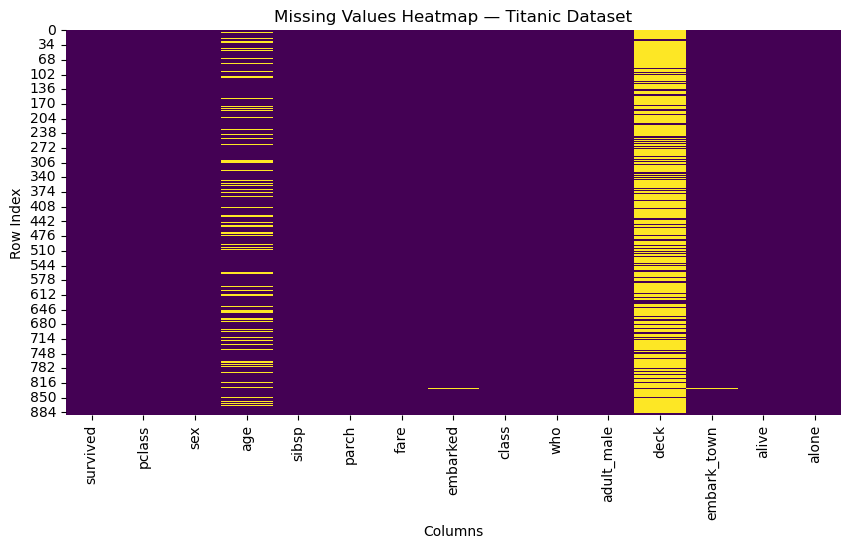


--- Percentage of Missing Values ---
             Missing Values  Percentage (%)
deck                    688           77.22
age                     177           19.87
embarked                  2            0.22
embark_town               2            0.22


<Figure size 800x500 with 0 Axes>

<Axes: xlabel='None', ylabel='Percentage (%)'>

Text(0.5, 1.0, 'Percentage of Missing Data by Column')

([0, 1, 2, 3],
 [Text(0, 0, 'deck'),
  Text(1, 0, 'age'),
  Text(2, 0, 'embarked'),
  Text(3, 0, 'embark_town')])

Text(0, 0.5, 'Missing (%)')

Text(0.5, 0, 'Column')

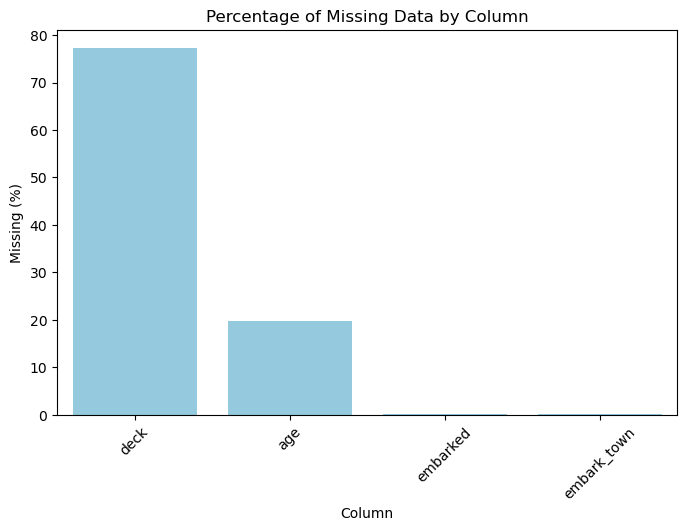

In [39]:
# 1️⃣ Check missing values
# -------------------------
# isnull() returns True for missing values; sum() counts how many
missing_values = titanic.isnull().sum()

# Sort in descending order to see the most affected columns first
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("\n--- Missing Values per Column ---")
print(missing_values)

# -------------------------
# 2️⃣ Visualize missing values
# -------------------------
plt.figure(figsize=(10, 5))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap — Titanic Dataset")
plt.xlabel("Columns")
plt.ylabel("Row Index")
plt.show()
# ➤ The heatmap highlights which columns have NaNs (yellow/white patches)

# -------------------------
# 3️⃣ Percentage of missing data
# -------------------------
# Calculate percentage of missing data in each column
missing_percentage = (titanic.isnull().mean() * 100).round(2)
missing_df = pd.DataFrame({'Missing Values': missing_values, 
                           'Percentage (%)': missing_percentage[missing_values.index]})
print("\n--- Percentage of Missing Values ---")
print(missing_df)

# -------------------------
# 4️⃣ Visualize missing percentage (bar chart)
# -------------------------
plt.figure(figsize=(8, 5))
sns.barplot(x=missing_df.index, y='Percentage (%)', data=missing_df, color='skyblue')
plt.title("Percentage of Missing Data by Column")
plt.xticks(rotation=45)
plt.ylabel("Missing (%)")
plt.xlabel("Column")
plt.show()

(c) Visualization of key relationships (e.g., survival rate by class, age, gender, etc.).

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='class', ylabel='survived'>

Text(0.5, 1.0, 'Average Survival Rate by Passenger Class')

Text(0.5, 0, 'Passenger Class')

Text(0, 0.5, 'Survival Rate')

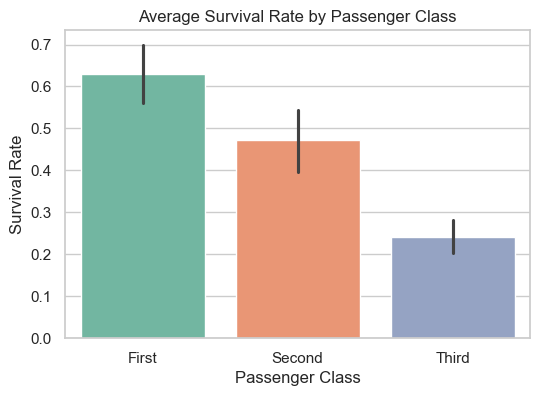

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='sex', ylabel='survived'>

Text(0.5, 1.0, 'Survival Rate by Gender')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Survival Rate')

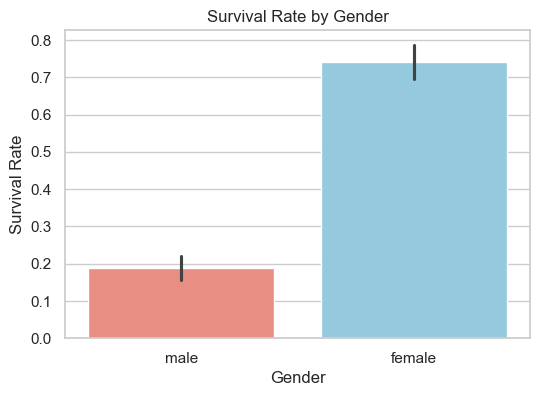

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'Age Distribution by Survival')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Number of Passengers')

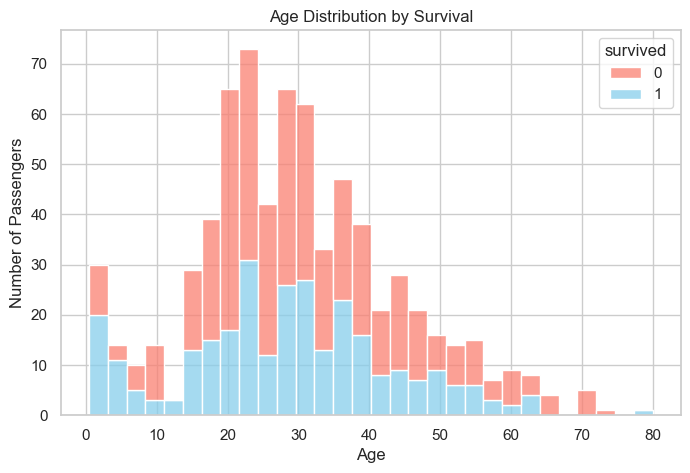

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='embarked', ylabel='survived'>

Text(0.5, 1.0, 'Survival Rate by Embarkation Port')

Text(0.5, 0, 'Embarkation Port')

Text(0, 0.5, 'Survival Rate')

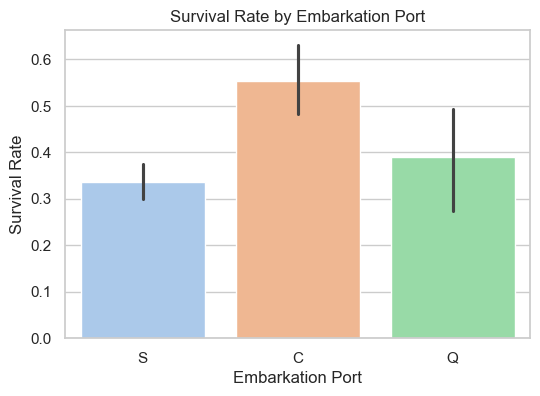

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='class', ylabel='survived'>

Text(0.5, 1.0, 'Survival Rate by Gender within Each Class')

Text(0.5, 0, 'Passenger Class')

Text(0, 0.5, 'Survival Rate')

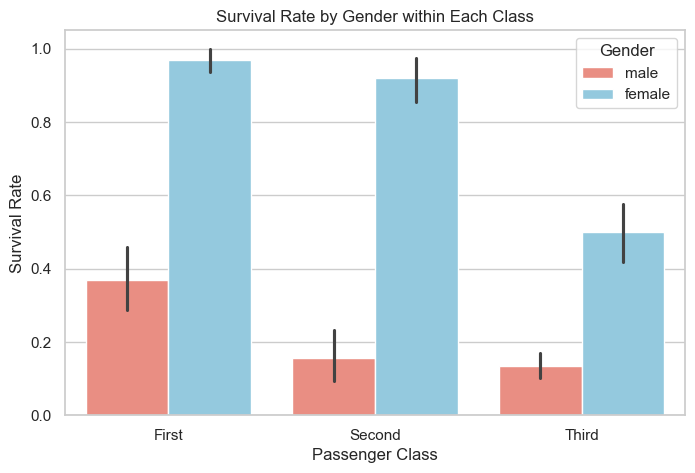

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='age', ylabel='fare'>

Text(0.5, 1.0, 'Fare vs Age Colored by Survival')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Fare')

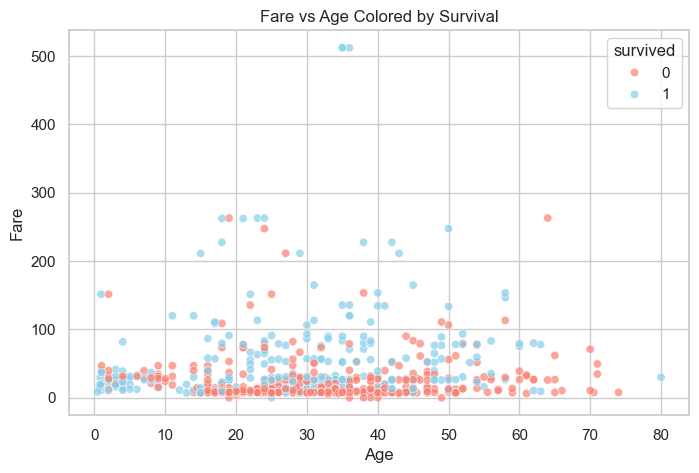

In [40]:
# Set a clean style
sns.set(style="whitegrid")

# ---------------------------------------------------------------
# 1️⃣ Survival rate by passenger class (Pclass)
# ---------------------------------------------------------------
plt.figure(figsize=(6, 4))
sns.barplot(data=titanic, x='class', y='survived', hue='class', palette='Set2', legend=False)
plt.title("Average Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()
# ➤ Shows that 1st-class passengers had the highest chance of survival.

# ---------------------------------------------------------------
# 2️⃣ Survival rate by gender
# ---------------------------------------------------------------
plt.figure(figsize=(6, 4))
sns.barplot(data=titanic, x='sex', y='survived', hue='sex', palette=['salmon', 'skyblue'], legend=False)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()
# ➤ Females had a significantly higher survival rate than males.

# ---------------------------------------------------------------
# 3️⃣ Survival rate by age
# ---------------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.histplot(data=titanic, x='age', hue='survived', multiple='stack', bins=30, palette=['salmon', 'skyblue'])
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()
# ➤ Children and younger passengers had higher survival chances.
# ➤ Missing age values can slightly bias this chart (as seen earlier).

# ---------------------------------------------------------------
# 4️⃣ Survival rate by Embarkation Port
# ---------------------------------------------------------------
plt.figure(figsize=(6, 4))
sns.barplot(data=titanic, x='embarked', y='survived', hue='embarked', palette='pastel', legend=False)
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Survival Rate")
plt.show()
# ➤ Passengers from port 'C' (Cherbourg) had higher survival rates.
# ➤ Could be linked to more 1st-class passengers boarding there.

# ---------------------------------------------------------------
# 5️⃣ Combined relationship — Gender vs Class
# ---------------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.barplot(data=titanic, x='class', y='survived', hue='sex', palette=['salmon', 'skyblue'])
plt.title("Survival Rate by Gender within Each Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.legend(title='Gender')
plt.show()
# ➤ Female survival was higher across all classes.
# ➤ 1st-class females had the highest survival probability.

# ---------------------------------------------------------------
# 6️⃣ Age vs Fare vs Survival (3D relationship via scatter)
# ---------------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(data=titanic, x='age', y='fare', hue='survived', palette=['salmon', 'skyblue'], alpha=0.7)
plt.title("Fare vs Age Colored by Survival")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()
# ➤ Many high-fare (1st class) passengers survived; most low-fare (3rd class) did not.

(d) Identification of potential outliers or anomalies.

Numerical Columns: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


<Figure size 1200x800 with 0 Axes>

<Axes: >

<Axes: ylabel='survived'>

Text(0.5, 1.0, 'Boxplot of survived')

<Axes: >

<Axes: ylabel='pclass'>

Text(0.5, 1.0, 'Boxplot of pclass')

<Axes: >

<Axes: ylabel='age'>

Text(0.5, 1.0, 'Boxplot of age')

<Axes: >

<Axes: ylabel='sibsp'>

Text(0.5, 1.0, 'Boxplot of sibsp')

<Axes: >

<Axes: ylabel='parch'>

Text(0.5, 1.0, 'Boxplot of parch')

<Axes: >

<Axes: ylabel='fare'>

Text(0.5, 1.0, 'Boxplot of fare')

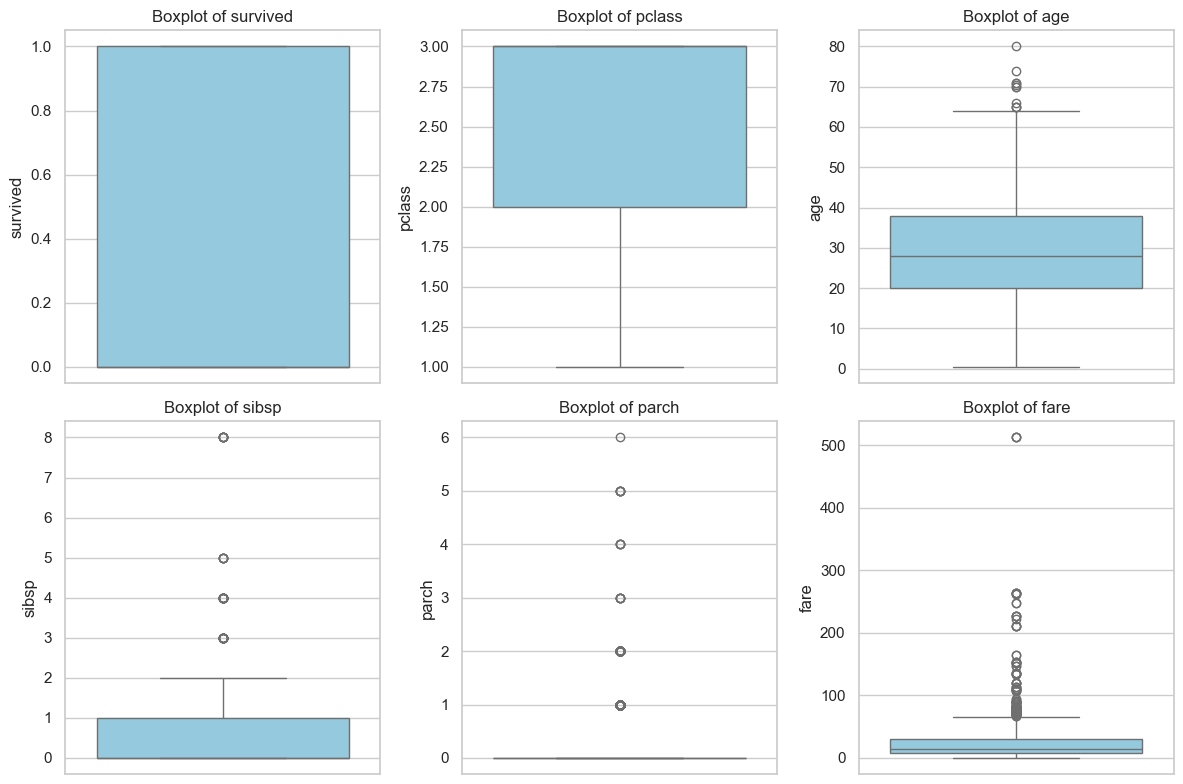

<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='fare'>

Text(0.5, 1.0, 'Fare — Outlier Detection')

Text(0.5, 0, 'Fare')

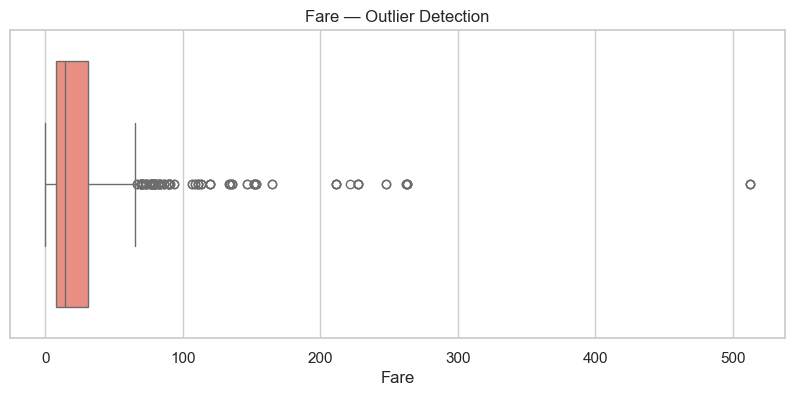

<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='age'>

Text(0.5, 1.0, 'Age — Outlier Detection')

Text(0.5, 0, 'Age')

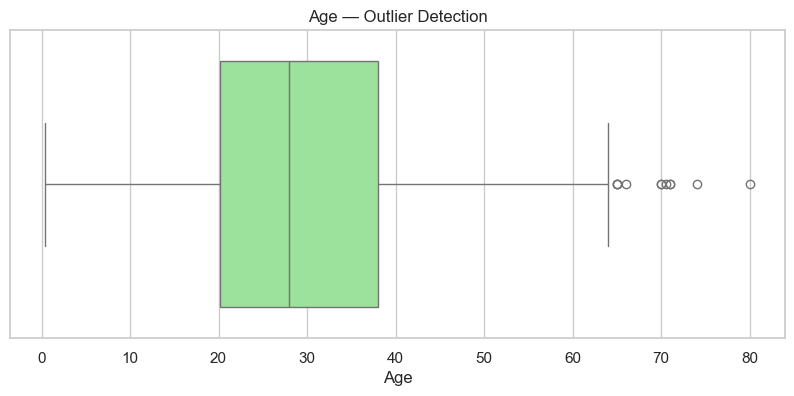


--- Outlier Analysis for 'Fare' ---
Lower Bound: -26.72, Upper Bound: 65.63
Number of Outliers: 116
Highest Fare: 512.33


<Figure size 800x400 with 0 Axes>

<Axes: xlabel='fare', ylabel='Count'>

Text(0.5, 1.0, 'Fare Distribution (Highly Skewed with Outliers)')

Text(0.5, 0, 'Fare')

Text(0, 0.5, 'Count')

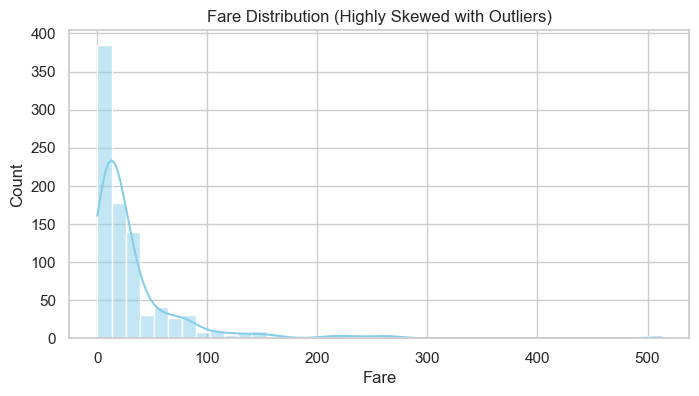

<Figure size 800x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Between Numerical Features')

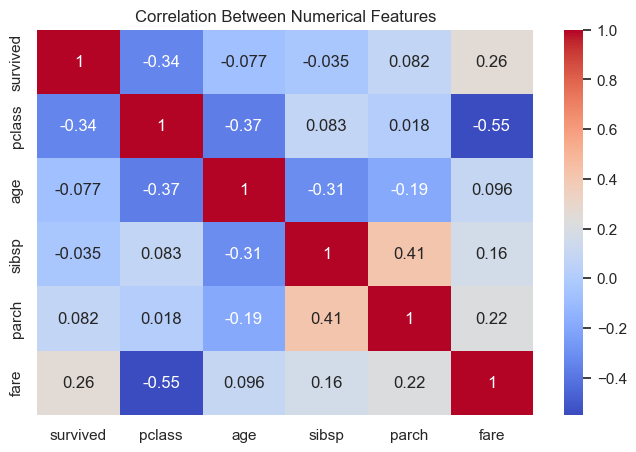

In [41]:
# 1️⃣ Select numerical columns
# -------------------------
numeric_cols = titanic.select_dtypes(include=['number']).columns
print("Numerical Columns:", list(numeric_cols))

# -------------------------
# 2️⃣ Visualize potential outliers using Boxplots
# -------------------------
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=titanic, y=col, color='skyblue')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# 🧠 Boxplots help detect outliers visually:
# - Points far above/below the whiskers are potential outliers.
# - Especially useful for 'fare', 'age', 'sibsp', and 'parch'.

# -------------------------
# 3️⃣ Focus on key variables likely to have outliers
# -------------------------
plt.figure(figsize=(10, 4))
sns.boxplot(data=titanic, x='fare', color='salmon')
plt.title("Fare — Outlier Detection")
plt.xlabel("Fare")
plt.show()

# ➤ 'Fare' shows extreme right-side outliers — some passengers paid much higher fares.

plt.figure(figsize=(10, 4))
sns.boxplot(data=titanic, x='age', color='lightgreen')
plt.title("Age — Outlier Detection")
plt.xlabel("Age")
plt.show()

# ➤ 'Age' has fewer outliers — a few passengers appear older than most others.

# -------------------------
# 4️⃣ Quantitative Outlier Detection using IQR Method
# -------------------------
def find_outliers_iqr(df, column):
    """Returns a DataFrame of outliers based on IQR."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check for outliers in 'fare'
fare_outliers, low, high = find_outliers_iqr(titanic, 'fare')
print(f"\n--- Outlier Analysis for 'Fare' ---")
print(f"Lower Bound: {low:.2f}, Upper Bound: {high:.2f}")
print(f"Number of Outliers: {len(fare_outliers)}")
print(f"Highest Fare: {titanic['fare'].max():.2f}")

# -------------------------
# 5️⃣ Visualize Fare Distribution with KDE (to confirm skewness)
# -------------------------
plt.figure(figsize=(8, 4))
sns.histplot(titanic['fare'], bins=40, kde=True, color='skyblue')
plt.title("Fare Distribution (Highly Skewed with Outliers)")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()
# ➤ The long right tail confirms that a few passengers paid extremely high fares.

# -------------------------
# 6️⃣ Correlation Heatmap to see impact of outliers
# -------------------------
plt.figure(figsize=(8, 5))
sns.heatmap(titanic[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()
# ➤ Outliers in 'fare' can distort correlations (e.g., with class or survival).

(e) A summary of key insights derived from your analysis, focusing on factors influencing survival.

<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Between Numerical Variables')

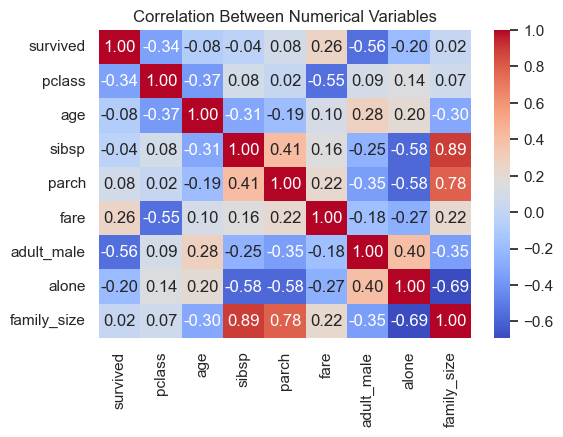

"\n💡 Interpretation:\n- 'fare' and 'pclass' show moderate correlation with survival.\n- Higher fare = higher class = better chance of survival.\n- Age has slight negative correlation (younger passengers survived more).\n"

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='class', ylabel='survived'>

Text(0.5, 1.0, 'Survival Rate by Passenger Class')

Text(0, 0.5, 'Mean Survival Rate')

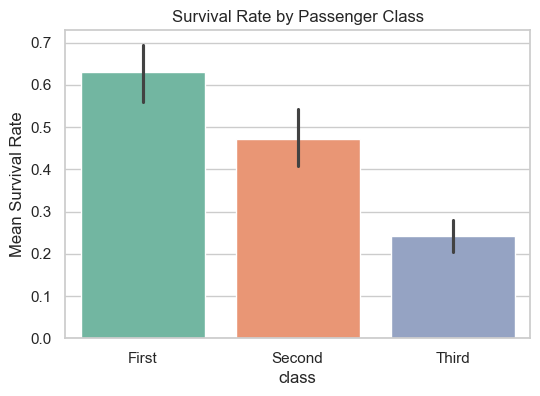

'\n💡 Insight:\n- 1st class passengers had the highest survival (~63%).\n- 3rd class had the lowest (~24%).\n→ Class (wealth/status) played a major role.\n'

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='sex', ylabel='survived'>

Text(0.5, 1.0, 'Survival Rate by Gender')

Text(0, 0.5, 'Mean Survival Rate')

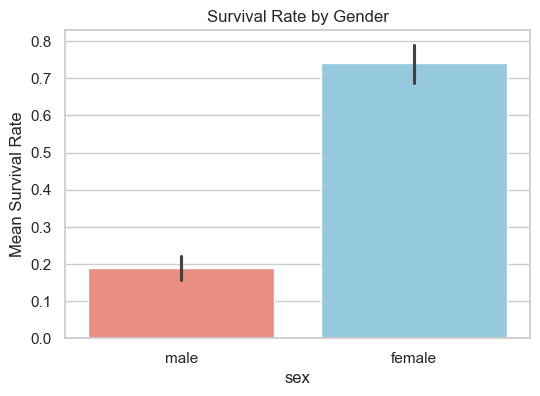

"\n💡 Insight:\n- Female survival ≈ 74%\n- Male survival ≈ 19%\n→ 'Women first' rule strongly influenced outcomes.\n"

<Figure size 700x400 with 0 Axes>

C:\Users\tarandhara\AppData\Local\Temp\ipykernel_32580\3837465130.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=titanic, x='age_group', y='survived', palette='pastel')


<Axes: xlabel='age_group', ylabel='survived'>

Text(0.5, 1.0, 'Survival Rate by Age Group')

Text(0, 0.5, 'Mean Survival Rate')

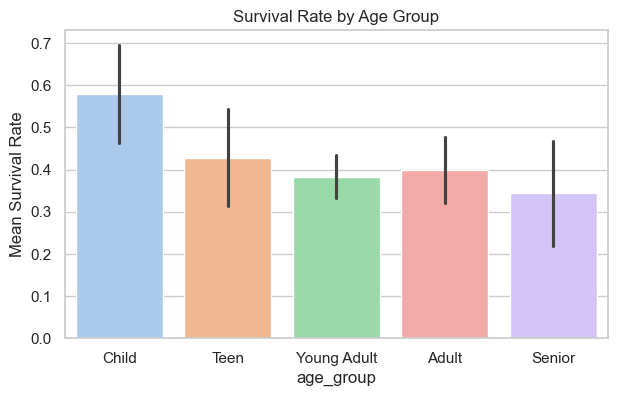

'\n💡 Insight:\n- Children had the highest survival rate (~60%+).\n- Survival dropped sharply for adults and seniors.\n→ Age influenced survival: younger = better chance.\n'

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='embarked', ylabel='survived'>

Text(0.5, 1.0, 'Survival Rate by Embarkation Port')

Text(0, 0.5, 'Mean Survival Rate')

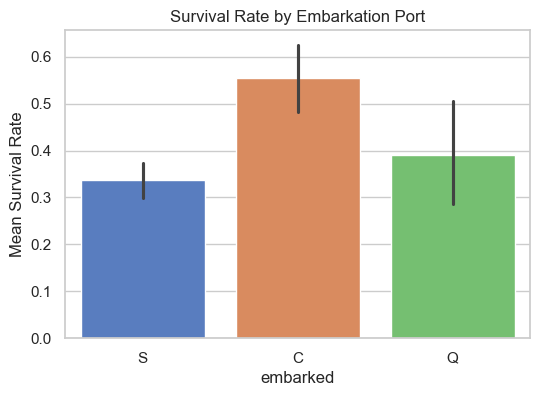

'\n💡 Insight:\n- Passengers from Cherbourg (C) survived more.\n→ Likely because many were 1st class travelers.\n'

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='class', ylabel='survived'>

Text(0.5, 1.0, 'Survival Rate by Gender within Each Class')

Text(0, 0.5, 'Mean Survival Rate')

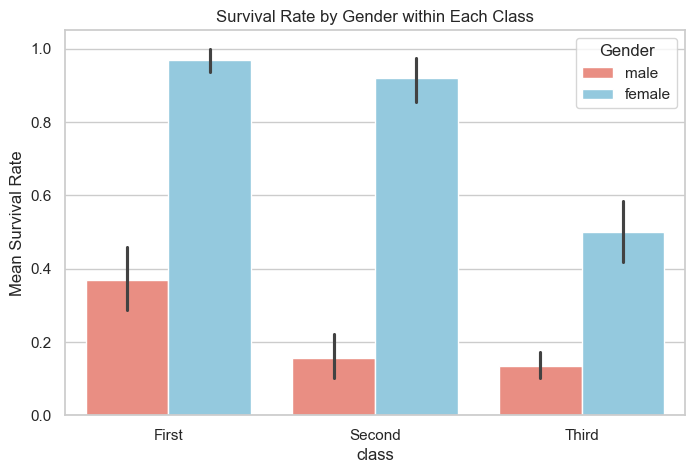

'\n💡 Insight:\n- Across all classes, females survived far more than males.\n- Even in 3rd class, female survival was higher.\n→ Gender and class had combined strong influence.\n'

<Figure size 700x400 with 0 Axes>

C:\Users\tarandhara\AppData\Local\Temp\ipykernel_32580\3837465130.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=titanic, x='family_size', y='survived', palette='coolwarm')


<Axes: xlabel='family_size', ylabel='survived'>

Text(0.5, 1.0, 'Survival Rate by Family Size')

Text(0, 0.5, 'Mean Survival Rate')

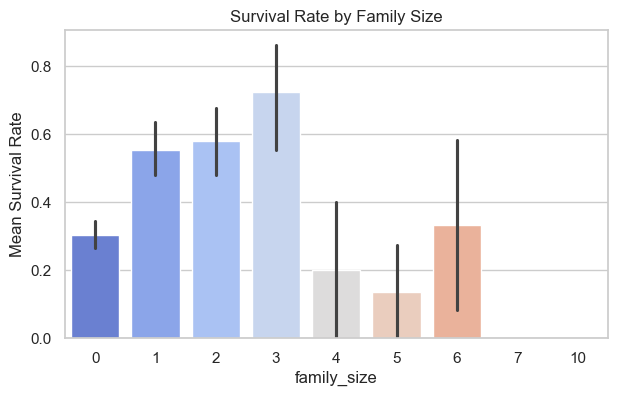

'\n💡 Insight:\n- Small families (1–2 members) had higher survival.\n- Solo travelers and large families had lower survival.\n→ Moderate family size provided better survival support.\n'

In [47]:
# =====================================================================
# (e) FACTORS INFLUENCING SURVIVAL — DATA-DRIVEN ANALYSIS
# =====================================================================

sns.set(style="whitegrid")

# ---------------------------------------------------------------
# 1️⃣ Correlation analysis for numerical variables
# ---------------------------------------------------------------
plt.figure(figsize=(6,4))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numerical Variables")
plt.show()

"""
💡 Interpretation:
- 'fare' and 'pclass' show moderate correlation with survival.
- Higher fare = higher class = better chance of survival.
- Age has slight negative correlation (younger passengers survived more).
"""

# ---------------------------------------------------------------
# 2️⃣ Survival Rate by Passenger Class
# ---------------------------------------------------------------
plt.figure(figsize=(6,4))
sns.barplot(data=titanic, x='class', y='survived', hue='class', palette='Set2', legend=False)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Mean Survival Rate")
plt.show()

"""
💡 Insight:
- 1st class passengers had the highest survival (~63%).
- 3rd class had the lowest (~24%).
→ Class (wealth/status) played a major role.
"""

# ---------------------------------------------------------------
# 3️⃣ Survival Rate by Gender
# ---------------------------------------------------------------
plt.figure(figsize=(6,4))
sns.barplot(data=titanic, x='sex', y='survived', hue='sex', palette=['salmon', 'skyblue'], legend=False)
plt.title("Survival Rate by Gender")
plt.ylabel("Mean Survival Rate")
plt.show()

"""
💡 Insight:
- Female survival ≈ 74%
- Male survival ≈ 19%
→ 'Women first' rule strongly influenced outcomes.
"""

# ---------------------------------------------------------------
# 4️⃣ Survival Rate by Age Group
# ---------------------------------------------------------------

# Create custom age bins for clarity
titanic['age_group'] = pd.cut(titanic['age'], bins=[0, 12, 18, 35, 50, 80], 
                              labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

plt.figure(figsize=(7,4))
sns.barplot(data=titanic, x='age_group', y='survived', palette='pastel')
plt.title("Survival Rate by Age Group")
plt.ylabel("Mean Survival Rate")
plt.show()

"""
💡 Insight:
- Children had the highest survival rate (~60%+).
- Survival dropped sharply for adults and seniors.
→ Age influenced survival: younger = better chance.
"""

# ---------------------------------------------------------------
# 5️⃣ Survival Rate by Embarkation Port
# ---------------------------------------------------------------
plt.figure(figsize=(6,4))
sns.barplot(data=titanic, x='embarked', y='survived', hue='embarked', palette='muted', legend=False)
plt.title("Survival Rate by Embarkation Port")
plt.ylabel("Mean Survival Rate")
plt.show()

"""
💡 Insight:
- Passengers from Cherbourg (C) survived more.
→ Likely because many were 1st class travelers.
"""

# ---------------------------------------------------------------
# 6️⃣ Combined Effect: Class + Gender
# ---------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.barplot(data=titanic, x='class', y='survived', hue='sex', palette=['salmon', 'skyblue'])
plt.title("Survival Rate by Gender within Each Class")
plt.ylabel("Mean Survival Rate")
plt.legend(title='Gender')
plt.show()

"""
💡 Insight:
- Across all classes, females survived far more than males.
- Even in 3rd class, female survival was higher.
→ Gender and class had combined strong influence.
"""

# ---------------------------------------------------------------
# 7️⃣ Family Size Impact (sibsp + parch)
# ---------------------------------------------------------------
titanic['family_size'] = titanic['sibsp'] + titanic['parch']

plt.figure(figsize=(7,4))
sns.barplot(data=titanic, x='family_size', y='survived', palette='coolwarm')
plt.title("Survival Rate by Family Size")
plt.ylabel("Mean Survival Rate")
plt.show()

"""
💡 Insight:
- Small families (1–2 members) had higher survival.
- Solo travelers and large families had lower survival.
→ Moderate family size provided better survival support.
"""